Include all the necessary packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

Read the csv file into a dataframe df

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/TikTok/tiktok_dataset.csv')
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the details about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Get the summary of the statistics about all columns

In [ ]:
df.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


Check for missing values in the data

In [ ]:
df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

Understand and inspect data

In [ ]:
df['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

Check the mean and median of view counts for claim and opinion

In [ ]:
claim=df[df['claim_status']=='claim']
print(claim['video_view_count'].mean())
print(claim['video_view_count'].median())

501029.4527477102
501555.0


In [ ]:
opinion=df[df['claim_status']=='opinion']
print(opinion['video_view_count'].mean())
print(opinion['video_view_count'].median())

4956.43224989447
4953.0


compare claimstatus with author banstatus

In [ ]:
df.groupby(['claim_status','author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

compare mean video share based on author ban status

In [ ]:
df.groupby(['author_ban_status']).agg({'video_share_count':['mean','median'],
                                       'video_view_count':['mean','median'],
                                       'video_like_count':['mean','median']})

video_share_count          video_view_count            \
                               mean   median             mean    median   
author_ban_status                                                         
active                 14111.466164    437.0    215927.039524    8616.0   
banned                 29998.942508  14468.0    445845.439144  448201.0   
under review           25774.696999   9444.0    392204.836399  365245.5   

                  video_like_count            
                              mean    median  
author_ban_status                             
active                71036.533836    2222.0  
banned               153017.236697  105573.0  
under review         128718.050339   71204.5

In [ ]:
df.groupby(['author_ban_status']).agg(
    {'video_view_count': ['count', 'mean', 'median'],
     'video_like_count': ['count', 'mean', 'median'],
     'video_share_count': ['count', 'mean', 'median']
     })

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

Next,lets create three columns
1.likes per view
2.comments per view
3.shares per view



In [ ]:
df['likes_per_view']=df['video_like_count']/df['video_view_count']
df['comments_per_view']=df['video_comment_count']/df['video_view_count']
df['shares_per_view']=df['video_share_count']/df['video_view_count']

Now compare the 3 newly created columns with claimstatus and authorbanstatus

In [ ]:
df.groupby(['claim_status','author_ban_status']).agg({'likes_per_view':['count','mean','median'],
                                                      'comments_per_view':['count','mean','median'],
                                                      'shares_per_view':['count','mean','median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

EDA

Check for video duration with boxplot

<Axes: title={'center': 'video_duration_sec'}, xlabel='video_duration_sec'>

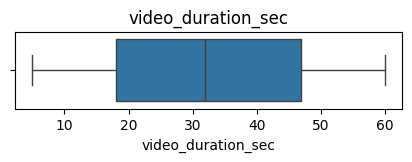

In [ ]:
plt.figure(figsize=(5,1))
plt.title('video_duration_sec')
sns.boxplot(x='video_duration_sec',data=df)

Check for it with histogram

<Axes: title={'center': 'video_duration_sec'}, xlabel='video_duration_sec', ylabel='Count'>

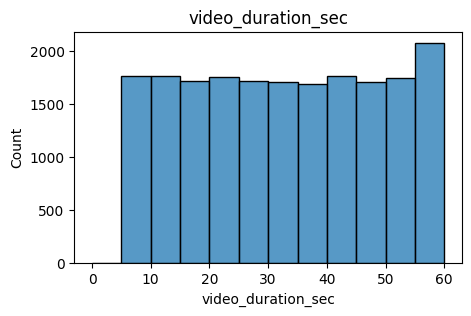

In [ ]:
plt.figure(figsize=(5,3))
plt.title('video_duration_sec')
sns.histplot(x='video_duration_sec',data=df,bins=range(0,61,5))

Boxplot for video view count

<Axes: title={'center': 'video_view_count'}, xlabel='video_view_count'>

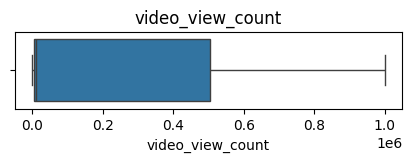

In [ ]:
plt.figure(figsize=(5,1))
plt.title('video_view_count')
sns.boxplot(x='video_view_count',data=df)

Histogram for video view count

<Axes: title={'center': 'video_view_count'}, xlabel='video_view_count', ylabel='Count'>

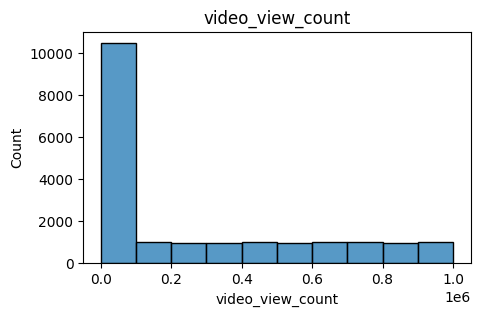

In [ ]:
plt.figure(figsize=(5,3))
plt.title('video_view_count')
sns.histplot(x='video_view_count',data=df,bins=range(0,10**6 +1 ,10**5))

Boxplot for video like count

<Axes: title={'center': 'video_like_count'}, xlabel='video_like_count'>

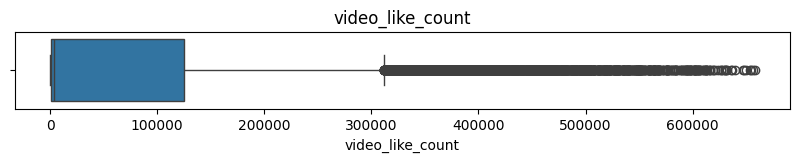

In [ ]:
plt.figure(figsize=(10,1))
plt.title('video_like_count')
sns.boxplot(x='video_like_count',data=df)

Histogram for vidoe like count

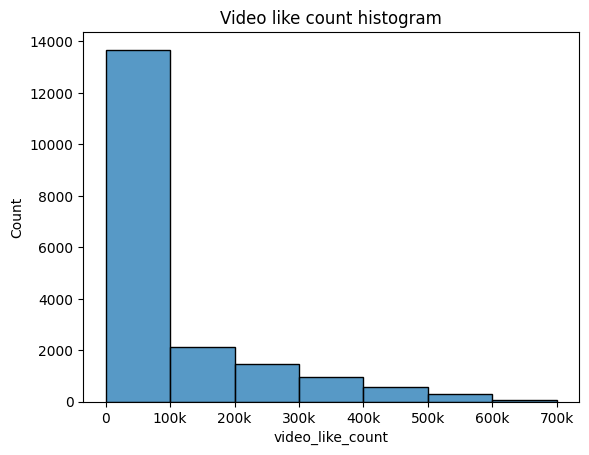

In [ ]:
ax = sns.histplot(df['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video like count histogram');

Boxplot for video comment count

<Axes: title={'center': 'video_comment_count'}, xlabel='video_comment_count'>

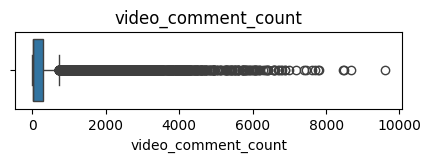

In [ ]:
plt.figure(figsize=(5,1))
plt.title('video_comment_count')
sns.boxplot(x='video_comment_count',data=df)

Histogram for video comment count

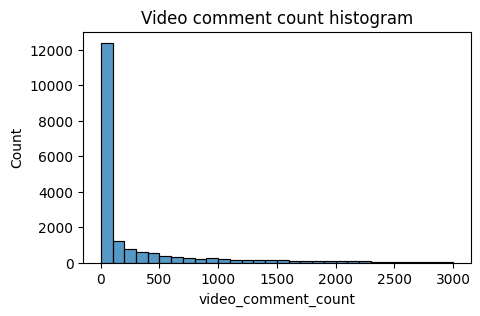

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(df['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video comment count histogram');

Boxplot for video share count

<Axes: title={'center': 'video_share_count'}, xlabel='video_share_count'>

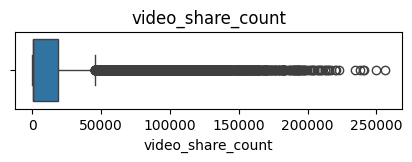

In [ ]:
plt.figure(figsize=(5,1))
plt.title('video_share_count')
sns.boxplot(x='video_share_count',data=df)

Histogram for video share count

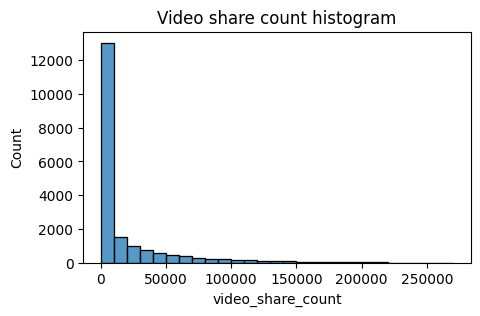

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(df['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video share count histogram');

Boxplot for video download count

<Axes: title={'center': 'video_download_count'}, xlabel='video_download_count'>

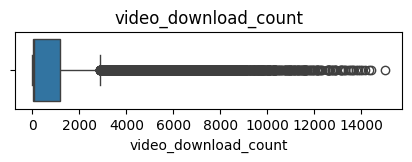

In [ ]:
plt.figure(figsize=(5,1))
plt.title('video_download_count')
sns.boxplot(x='video_download_count',data=df)

Histogram for video download count

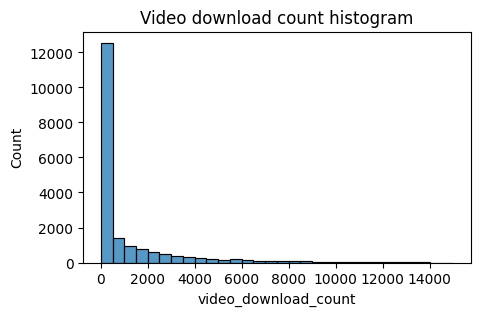

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(df['video_download_count'], bins=range(0,(15001),500))
plt.title('Video download count histogram');

Histogram with claim status by verification *status*

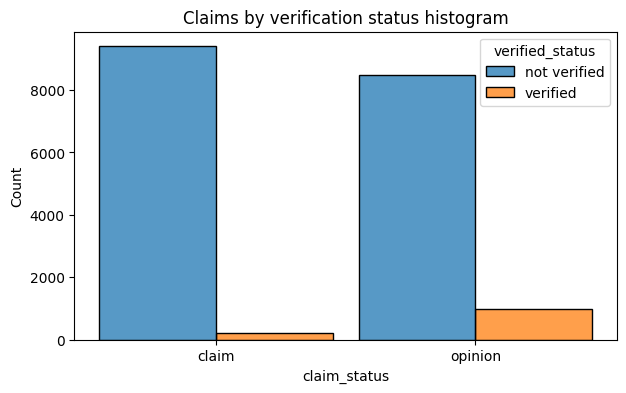

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data=df,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

Histogram with claim status by author ban status

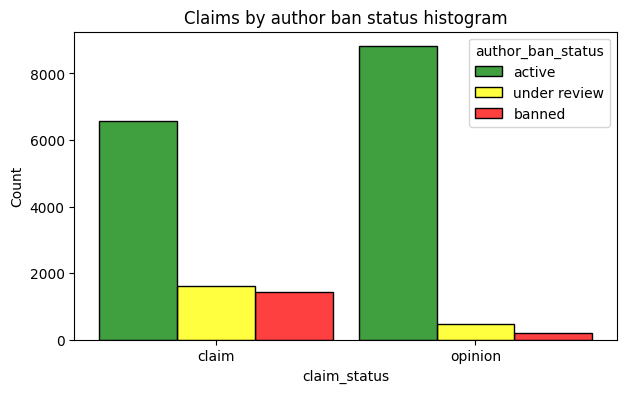

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data=df,
             x='claim_status',
             hue='author_ban_status',
             hue_order=['active', 'under review', 'banned'],
             multiple='dodge',
             palette={'active':'green', 'under review':'yellow', 'banned':'red'},
             shrink=0.9)
plt.title('Claims by author ban status histogram');

barplot with author ban status with median of views count

<ipython-input-29-feed5999248f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ban_status_count.index,


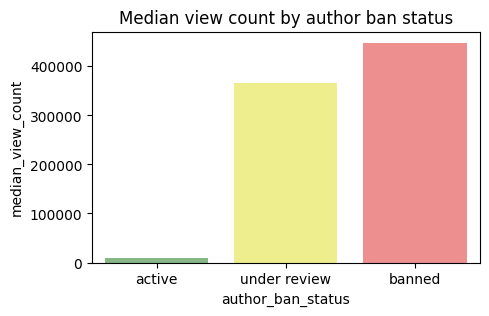

In [ ]:
ban_status_count=df.groupby(['author_ban_status']).agg({'video_view_count':['median']})
ban_status_count.columns=['median_view_count']
fig = plt.figure(figsize=(5,3))
sns.barplot(x=ban_status_count.index,
            y='median_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'yellow', 'banned':'red'},
            alpha=0.5,
            data=ban_status_count)
plt.title('Median view count by author ban status');

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

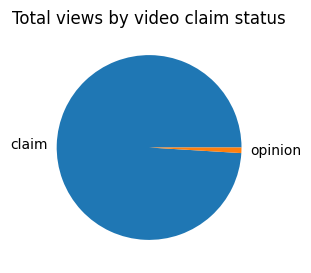

In [ ]:
fig=plt.figure(figsize=(3,3))
plt.pie(df.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

look for ouliers

In [ ]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count','video_duration_sec'
              ]

for column in count_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    outlier_threshold = median + 1.5*iqr
    outlier_count = (df[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882
Number of outliers, video_duration_sec: 0


scatter plot views with likes count for claim status

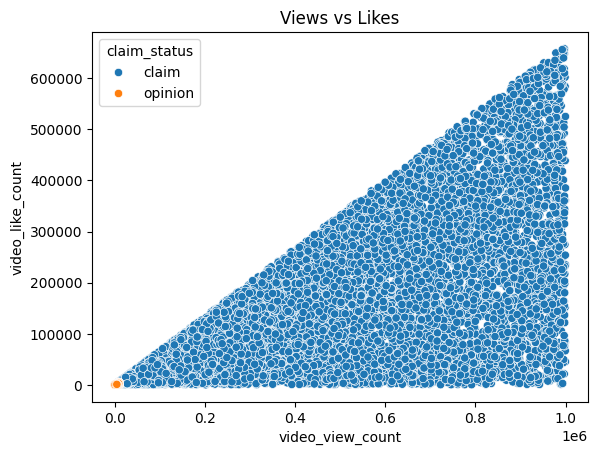

In [ ]:
sns.scatterplot(x='video_view_count', y='video_like_count',hue='claim_status', data=df)
plt.title('Views vs Likes');

scatterplot for opinion in claim status

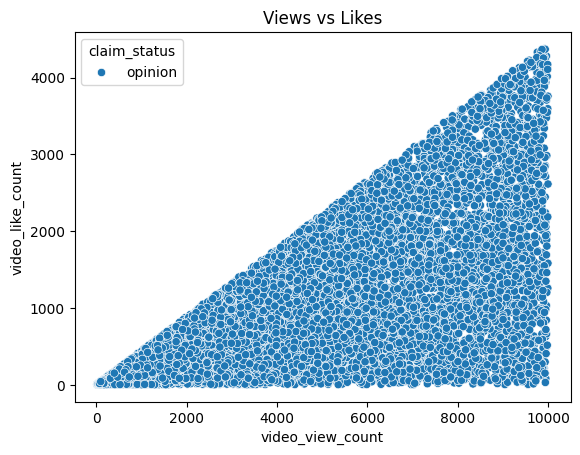

In [ ]:
sns.scatterplot(x='video_view_count', y='video_like_count',hue='claim_status', data=opinion)
plt.title('Views vs Likes');

**TO SEE THE VISUALIZATION IN TABLEAU**
[CLICK HERE](https://public.tableau.com/views/Tiktokclaimopinionclassification/Story1?:language=en-GB&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

Data exploration and hypothesis testing

Drop the missing rows

In [ ]:
df = df.dropna(axis=0)

relationship between verified_status and video_view_count

In [ ]:
df.groupby('verified_status')['video_view_count'].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

HYPOTHESIS TESTING

**Null Hypothesis -**  There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).


**Alternate Hypothesis -** There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

In [ ]:
#choose 5% as the significance level
not_verified = df[df["verified_status"] == "not verified"]["video_view_count"]
verified = df[df["verified_status"] == "verified"]["video_view_count"]

# Implement a t-test using the two samples
stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

TtestResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120, df=1571.163074387424)

Since the p-value is extremely small (much smaller than the significance level of 5%), you reject the null hypothesis. You conclude that there is a statistically significant difference in the mean video view count between verified and unverified accounts on TikTok.


Logistic Regression Model



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
df.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
likes_per_view              0
comments_per_view           0
shares_per_view             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Check for outliers in the boxplots

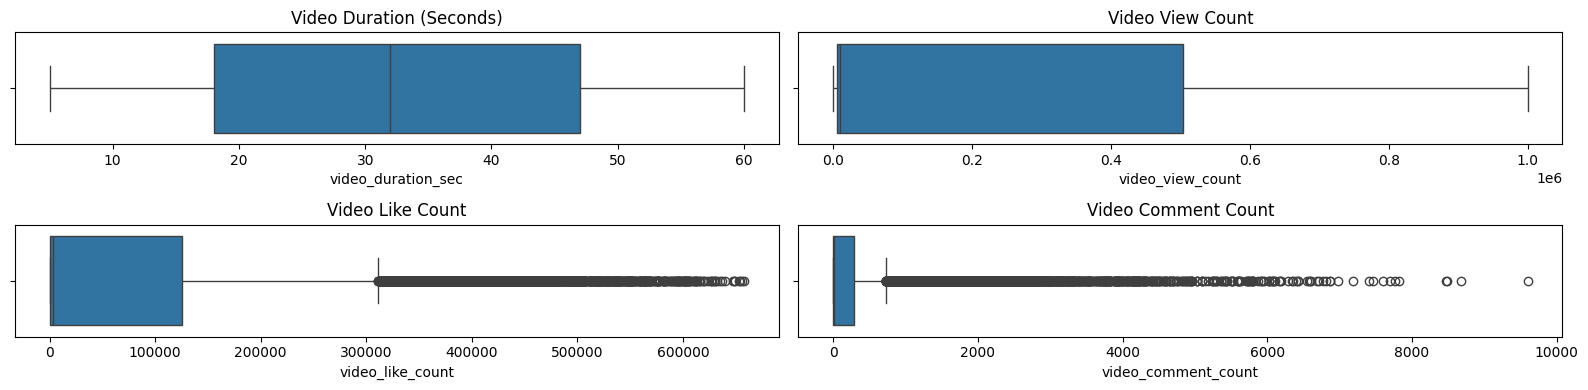

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 4))

axes[0,0].set_title('Video Duration (Seconds)')
sns.boxplot(data=df, x='video_duration_sec', ax=axes[0,0])

axes[0,1].set_title('Video View Count')
sns.boxplot(data=df, x='video_view_count', ax=axes[0,1])

axes[1,0].set_title('Video Like Count')
sns.boxplot(data=df, x='video_like_count', ax=axes[1,0])

axes[1,1].set_title('Video Comment Count')
sns.boxplot(data=df, x='video_comment_count', ax=axes[1,1])

plt.tight_layout()
plt.show()


Handling outliers in video like count and video comment count

In [ ]:
perc25=df['video_like_count'].quantile(0.25)
perc75=df['video_like_count'].quantile(0.75)
iqr=perc75-perc25
upper_limit=perc75+(1.5*iqr)
df.loc[df['video_like_count']>upper_limit,'video_like_count']=upper_limit

In [ ]:
perc25=df['video_comment_count'].quantile(0.25)
perc75=df['video_comment_count'].quantile(0.75)
iqr=perc75-perc25
upper_limit=perc75+(1.5*iqr)
df.loc[df['video_comment_count']>upper_limit,'video_comment_count']=upper_limit

Boxplots after removing outliers

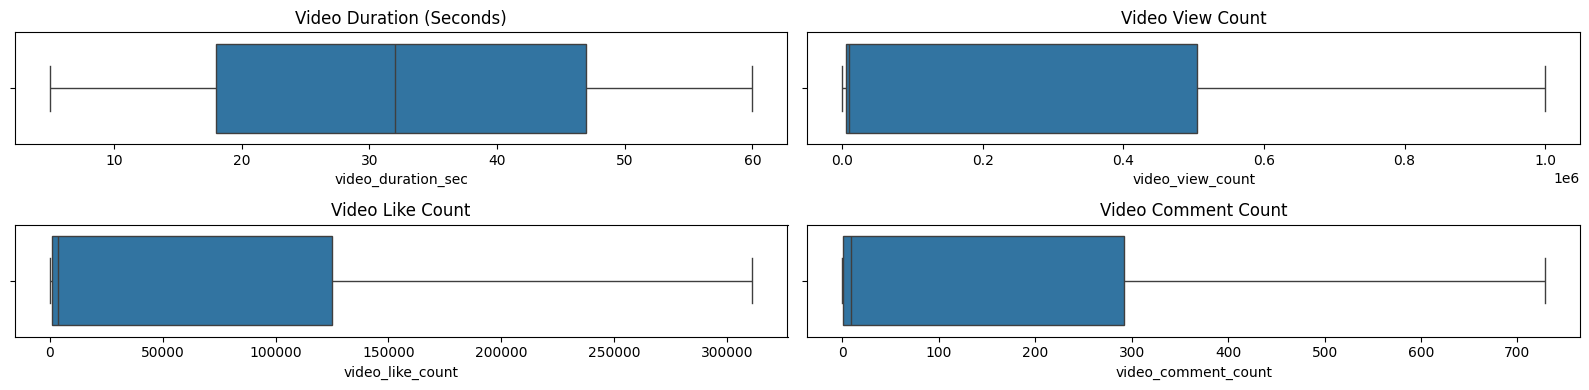

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 4))

axes[0,0].set_title('Video Duration (Seconds)')
sns.boxplot(data=df, x='video_duration_sec', ax=axes[0,0])

axes[0,1].set_title('Video View Count')
sns.boxplot(data=df, x='video_view_count', ax=axes[0,1])

axes[1,0].set_title('Video Like Count')
sns.boxplot(data=df, x='video_like_count', ax=axes[1,0])

axes[1,1].set_title('Video Comment Count')
sns.boxplot(data=df, x='video_comment_count', ax=axes[1,1])

plt.tight_layout()
plt.show()


Check class balance

In [ ]:
df['verified_status'].value_counts()

verified_status
not verified    17884
verified         1200
Name: count, dtype: int64

The class is imbalance so need to be resampled

In [ ]:
data_majority = df[df["verified_status"] == "not verified"]
data_minority = df[df["verified_status"] == "verified"]
data_minority_upsampled = resample(data_minority,
                                 replace=True,
                                 n_samples=len(data_majority),
                                 random_state=0)
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

data_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

Get the average video_transcription_text length for videos posted by verified accounts and the average video_transcription_text length for videos posted by unverified accounts.

In [ ]:
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [ ]:
data_upsampled["video_transcription_text_length"] = data_upsampled["video_transcription_text"].apply(lambda x: len(x))
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,video_transcription_text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

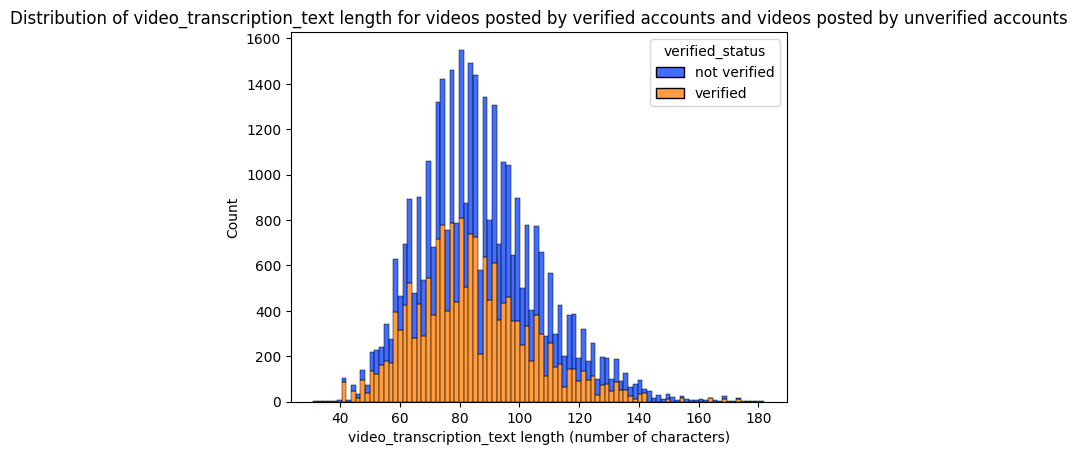

In [ ]:
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="video_transcription_text_length", kde=False,
             palette="bright",hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

Correlation matrix to help determine most correlated variables.

In [ ]:
data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count",
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "video_transcription_text_length"]].corr(numeric_only=True)

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length
video_duration_sec,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
video_transcription_text_length,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


Visualize a correlation heatmap of the data.

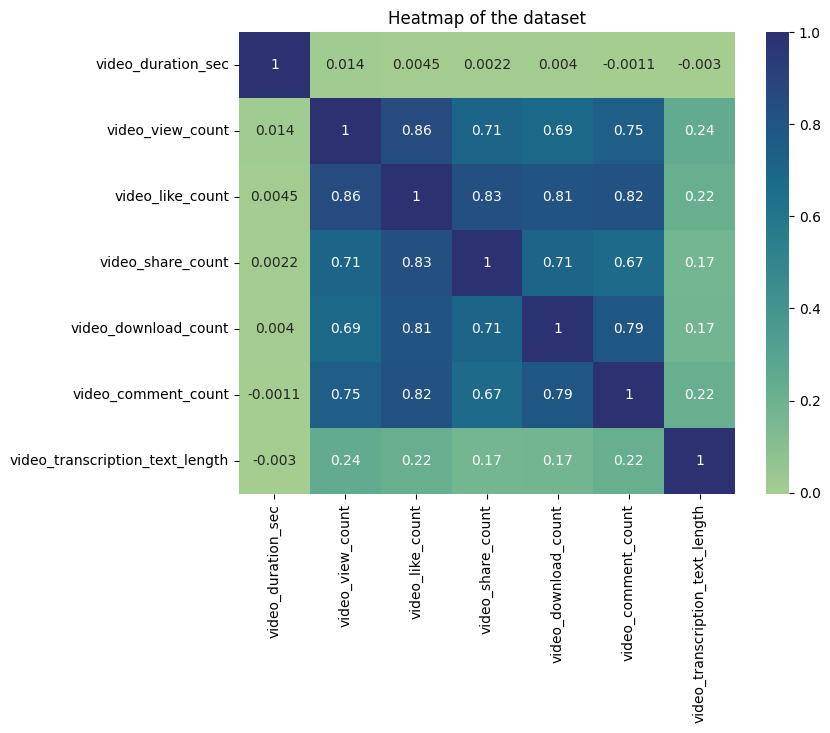

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count",
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "video_transcription_text_length"]]
    .corr(numeric_only=True),
    annot=True,
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

As multicolinearity need to be satisfied for a logistics regression we exclude video like count and use variables like view count , share count,comment count and download count to quantify video metrics

In [ ]:
y=data_upsampled['verified_status']
X=data_upsampled[['claim_status','author_ban_status','video_view_count','video_share_count','video_comment_count','video_download_count','video_duration_sec']]

In [ ]:
X.head()

,claim_status,author_ban_status,video_view_count,video_share_count,video_comment_count,video_download_count,video_duration_sec
0,claim,under review,343296.0,241.0,0.0,1.0,59
1,claim,active,140877.0,19034.0,684.0,1161.0,32
2,claim,active,902185.0,2858.0,329.0,833.0,31
3,claim,active,437506.0,34812.0,584.0,1234.0,25
4,claim,active,56167.0,4110.0,152.0,547.0,19


Split the data into training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

Check the data types of the features.

In [ ]:
X_train.dtypes

claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_comment_count     float64
video_download_count    float64
video_duration_sec        int64
dtype: object

In [ ]:
X_train['claim_status'].value_counts(), X_train['author_ban_status'].value_counts()

(claim_status
 opinion    17464
 claim       9362
 Name: count, dtype: int64,
 author_ban_status
 active          22758
 under review     2391
 banned           1677
 Name: count, dtype: int64)

claim status and author ban status are object data type .In order to work with the implementations of models through sklearn, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

In [ ]:
X_train_to_encode= X_train[['claim_status','author_ban_status']]
X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [ ]:
X_encoder=OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first')
X_train_encoded=X_encoder.fit_transform(X_train_to_encode)
X_train_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [ ]:
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_view_count,video_share_count,video_comment_count,video_download_count,video_duration_sec
33058,2252.0,23.0,0.0,4.0,33
20491,6664.0,550.0,2.0,53.0,52
25583,6327.0,257.0,0.0,3.0,37
18474,1702.0,28.0,0.0,0.0,57
27312,3842.0,101.0,0.0,1.0,21


In [ ]:
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)
X_train_final.head()

,video_view_count,video_share_count,video_comment_count,video_download_count,video_duration_sec,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,2252.0,23.0,0.0,4.0,33,1.0,0.0,0.0
1,6664.0,550.0,2.0,53.0,52,1.0,0.0,0.0
2,6327.0,257.0,0.0,3.0,37,1.0,0.0,0.0
3,1702.0,28.0,0.0,0.0,57,1.0,0.0,0.0
4,3842.0,101.0,0.0,1.0,21,1.0,0.0,0.0


Similarly encode x test

In [ ]:

X_test_to_encode = X_test[['claim_status', 'author_ban_status']]
X_test_encoded = X_encoder.transform(X_test_to_encode)
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

X_test_final = pd.concat([X_test.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True),
                         X_test_encoded_df], axis=1)
X_test_final.head()

,video_view_count,video_share_count,video_comment_count,video_download_count,video_duration_sec,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,2118.0,57.0,2.0,5.0,41,1.0,0.0,0.0
1,5701.0,157.0,0.0,1.0,27,1.0,0.0,0.0
2,449767.0,75385.0,728.5,5956.0,31,0.0,0.0,0.0
3,792813.0,56597.0,728.5,5146.0,19,0.0,0.0,0.0
4,2044.0,68.0,2.0,19.0,54,1.0,0.0,0.0


Check the data type of the outcome variable.

In [ ]:
y_train.dtypes

dtype('O')

In [ ]:
y_train.unique()

array(['verified', 'not verified'], dtype=object)

Encode categorical values of the outcome variable the training set

In [ ]:
y_encoder = OneHotEncoder(drop='first', sparse_output=False)
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

CONSTRUCT THE LOGISTIC REGRESSION MODEL

In [ ]:
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

In [ ]:
y_pred = log_clf.predict(X_test_final)

In [ ]:
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

Encode the true labels of the testing set so it can be compared to the predictions.

In [ ]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

Visualize model results

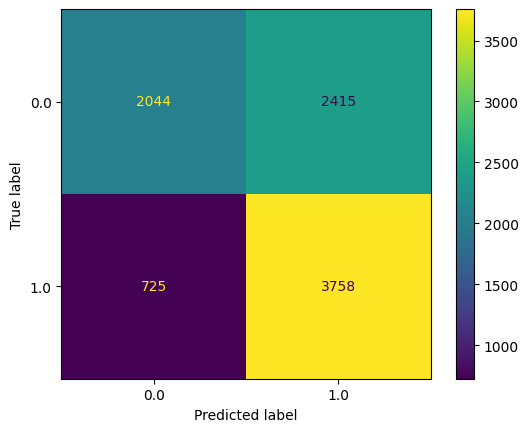

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
log_disp.plot()
plt.show()

classification report for logistic regression model

In [ ]:
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.46      0.57      4459
not verified       0.61      0.84      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.64      8942
weighted avg       0.67      0.65      0.64      8942



Interpret model coefficients

In [ ]:
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_view_count,-2.132079e-06
1,video_share_count,5.930971e-06
2,video_comment_count,-6.404235e-04
3,video_download_count,-1.099775e-05
4,video_duration_sec,8.607893e-03
5,claim_status_opinion,3.908384e-04
6,author_ban_status_banned,-1.781741e-05
7,author_ban_status_under review,-9.682447e-07


 Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status.


The logistic regression model had not great, but acceptable predictive power: a precision of 61% is less than ideal, but a recall of 84% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable.

**Classify videos using machine learning**


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

the models outcome variable is claim status so need to check its balance

In [ ]:
df['claim_status'].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

In [ ]:
df.drop(columns=['likes_per_view','comments_per_view','shares_per_view'],inplace=True)

In [ ]:
df['text_length']=df['video_transcription_text'].str.len()

In [ ]:
df[['claim_status', 'text_length']].groupby('claim_status').mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of text_length for claims and opinions using a histogram.

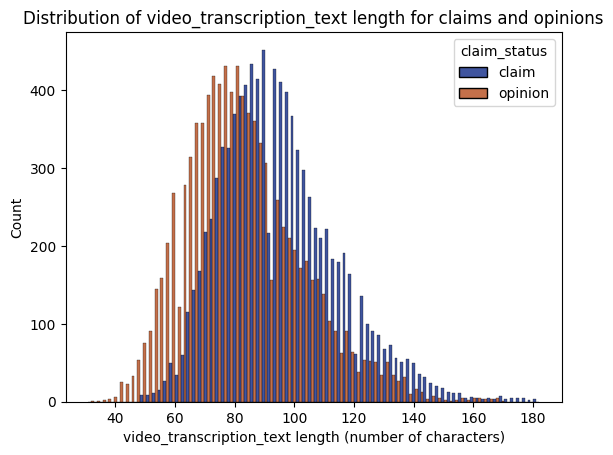

In [ ]:
sns.histplot(data=df, stat="count", multiple="dodge", x="text_length",
             kde=False, palette="dark", hue="claim_status",
             element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show()

**Feature selection and transformation**

In [ ]:
X = df.copy()
X = X.drop(['#', 'video_id'], axis=1)
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})
X = pd.get_dummies(X,
                   columns=['verified_status', 'author_ban_status'],
                   drop_first=True)
X.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


Split the data

In [ ]:
y= X['claim_status']
X=X.drop('claim_status',axis=1)

Create train/validate/test sets

Split data into training and testing sets, 80/20.

In [ ]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Split training data into training and validating sets, 75/25,to result in a final ratio of 60/20/20 for train/validate/test sets.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 11), (3817, 11), (3817, 11), (11450,), (3817,), (3817,))

Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts

In [ ]:
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

Fit the vectorizer to the training data (generate the n-grams) and transform it (tally the occurrences). Only fit to the training data, not the validation or test data.

In [ ]:
count_data = count_vec.fit_transform(X_train['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())
count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)
X_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,51,2487.0,310.0,20.0,1.0,0.0,134,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,43,118512.0,3543.0,374.0,70.0,29.0,97,False,True,False,...,0,1,0,0,0,0,0,0,0,0
2,22,105902.0,1885.0,229.0,39.0,9.0,76,False,False,True,...,0,1,0,0,0,0,0,0,0,0
3,17,9245.0,1670.0,440.0,13.0,4.0,58,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,18,3791.0,660.0,63.0,9.0,1.0,57,False,False,False,...,0,0,0,0,0,0,0,0,0,0


Similarly do for validation dataset

In [ ]:
validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)
X_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,11,578891.0,311333.875,14612.0,6591.0,44.0,72,False,False,True,...,0,0,0,0,0,0,0,1,0,0
1,24,6255.0,1709.000,311.0,13.0,1.0,96,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,35,410356.0,249714.000,26235.0,2060.0,728.5,88,False,False,False,...,0,1,0,0,0,0,0,1,0,0
3,58,406911.0,25986.000,1230.0,564.0,248.0,83,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,47,972573.0,138167.000,25320.0,3331.0,728.5,104,False,False,True,...,0,0,0,0,0,0,0,1,0,0


And for test data

In [ ]:
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']).reset_index(drop=True), test_count_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,54,692084.0,135956.000,16591.0,622.0,312.0,107,False,False,False,...,0,0,0,1,1,0,0,0,0,0
1,37,5164.0,1858.000,36.0,17.0,1.0,69,True,False,True,...,0,0,0,0,0,0,0,0,0,0
2,39,801951.0,311333.875,57608.0,8578.0,728.5,90,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,44,6429.0,2314.000,847.0,17.0,5.0,76,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,26,555780.0,106863.000,15348.0,252.0,91.0,72,False,False,False,...,0,0,0,0,0,0,0,0,0,0


Build a random forest model

In [ ]:
rf = RandomForestClassifier(random_state=0)
cv_params= {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }
scoring = {'accuracy', 'precision', 'recall', 'f1'}
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, refit='accuracy', cv=5)


In [ ]:
rf_cv.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='accuracy',
             scoring={'f1', 'recall', 'accuracy', 'precision'})

best recall score and best parameters

In [ ]:
rf_cv.best_score_,rf_cv.best_params_

(0.997117903930131,
 {'max_depth': None,
  'max_features': 0.6,
  'max_samples': 0.7,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200})

In [ ]:
y_pred = rf_cv.best_estimator_.predict(X_val_final)

In [ ]:
y_pred, y_val

(array([1, 0, 1, ..., 1, 1, 1]),
 5846     1
 12058    0
 2975     1
 8432     1
 6863     1
         ..
 6036     1
 6544     1
 2781     1
 6426     1
 4450     1
 Name: claim_status, Length: 3817, dtype: int64)

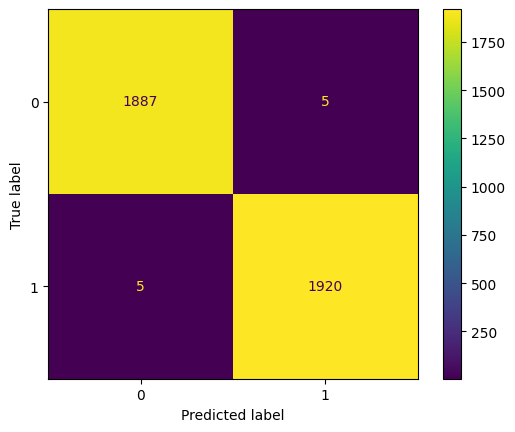

In [ ]:
log_cm = confusion_matrix(y_val, y_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)
log_disp.plot()
plt.show()

In [ ]:
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



Build an XGBoost model

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1'}
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [ ]:
%%time
xgb_cv.fit(X_train_final, y_train)

CPU times: user 2min 46s, sys: 1.75 s, total: 2min 48s
Wall time: 1min 51s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring={'f1', 'recall', 'accuracy', 'precision'})

In [ ]:
xgb_cv.best_score_, xgb_cv.best_params_

(0.9898176171763818,
 {'learning_rate': 0.1,
  'max_depth': 4,
  'min_child_weight': 3,
  'n_estimators': 300})

In [ ]:
y_pred = xgb_cv.best_estimator_.predict(X_val_final)

In [ ]:
y_pred, y_val

(array([1, 0, 1, ..., 1, 1, 1]),
 5846     1
 12058    0
 2975     1
 8432     1
 6863     1
         ..
 6036     1
 6544     1
 2781     1
 6426     1
 4450     1
 Name: claim_status, Length: 3817, dtype: int64)

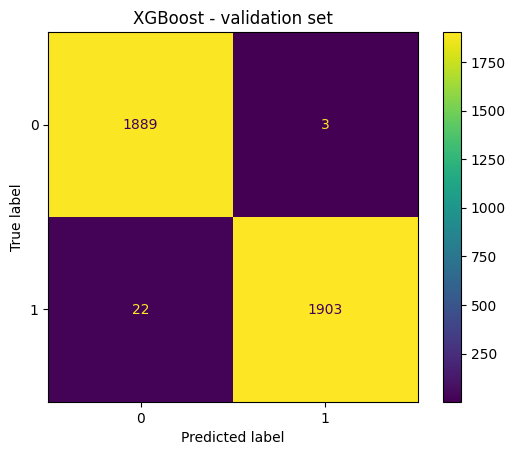

In [ ]:
log_cm = confusion_matrix(y_val, y_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)
log_disp.plot()
plt.title('XGBoost - validation set');
plt.show()

In [ ]:
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



In [ ]:
y_pred = rf_cv.best_estimator_.predict(X_test_final)

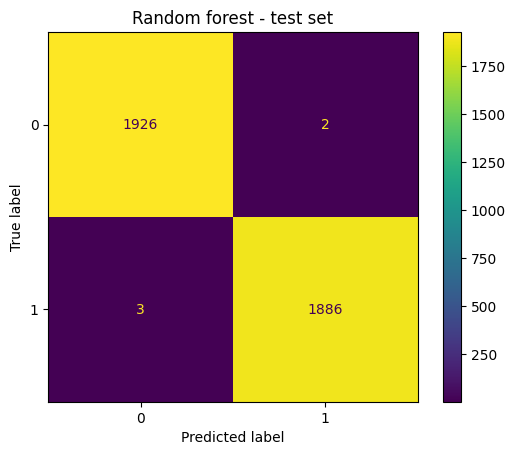

In [ ]:
log_cm = confusion_matrix(y_test, y_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)
log_disp.plot()
plt.title('Random forest - test set');
plt.show()

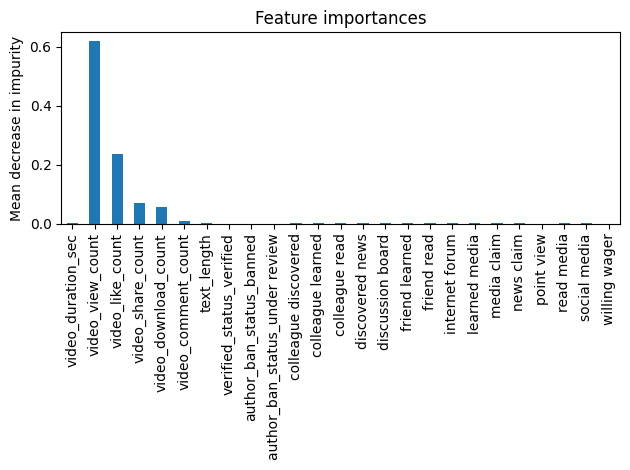

In [ ]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test_final.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()